<a href="https://colab.research.google.com/github/dayanajhdz-prog/estadistica-2/blob/main/test_energy_data.csvPrueba_de_energia_copia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
link="https://raw.githubusercontent.com/dayanajhdz-prog/estadistica-2/refs/heads/main/test_energy_data.csv"
df=pd.read_csv(link)
df

,edificio,pies_cuadrados,numero_ocupantes,aparatos,temperatura,dia,energia
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [91]:
#1 Establecer variables
y=df["energia"]
x=df["pies_cuadrados"]

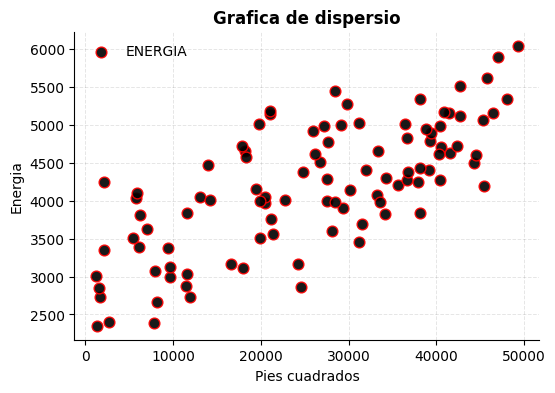

In [92]:
#2 Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt

#configuracion general
plt.figure(
figsize=(6,4),
  dpi=100
)


#grafico de dispersion
plt.scatter(
    x,y,
    marker="o",
    color="black",
    edgecolors="red",
    alpha=0.9,
    s=60,
    label="ENERGIA"

)


#Titulo
plt.title(
 "Grafica de dispersio",
 fontsize=12,
 fontweight="bold"


)
#Etiqueta eje x
plt.xlabel (
    "Pies cuadrados",
    fontsize=10
)

#Etiqueta eje y
plt.ylabel (
    "Energia",
    fontsize=10

)

#tamaño de los ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#margenes
plt.margins(x=0.05,y=0.05)     #espacio extra alrededor de los datos
plt.gca().spines[["top","right"]].set_visible(False)

#Cuadricula
plt.grid(
    visible= True,
    linestyle="--",
    linewidth= 0.7, #ancho de linea
    alpha=0.1,      #transparencia
    color="black"
)


#leyenda
plt.legend(
    fontsize=10,
    loc="best",
    frameon= False
    #bbox_to_anchor=(0.5,-0.15)

)

#Guardar imagen
plt.savefig(
    "dispersion",
    bbox_inches="tight"
)




¿Los datos soportan la suposición de linealidad?Sí soportan linealidad.

In [93]:
#4 Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, valor_p = pearsonr(x, y) #p es de prueba de hipotesis
                            # Ho:p=0 No hay correlacion (el cambio de una variable esta viculado con el cambio de otra variable)
                            #Hi:p/=0 Si hay correlacion
print(f"coeficiente correlacion (r):{r:0.4f}")
print(f"valor_p: {valor_p:0.4f}")

coeficiente correlacion (r):0.7240
valor_p: 0.0000


El valor P es < 0.05,Ho se rechaza.Si hay correlacion

In [94]:
#5 coeficiente de determinacion
print (f"coeficiente de determinacion :{r**2:0.4f}")

coeficiente de determinacion :0.5242


In [95]:
#6 Obtener la recta de regresion ajustada
import statsmodels.api as sm
x_constante =sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
y_calculada=modelo.predict(x_constante)
modelo.params


,0
const,3049.682473
pies_cuadrados,0.043965


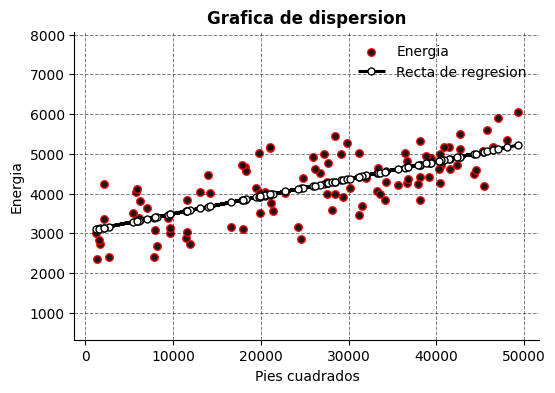

In [96]:
import matplotlib.pyplot as plt
#configuracion general
plt.figure(
figsize=(6,4),
  dpi=100
)


#grafico de dispersion
plt.scatter(
    x,y,
    marker="o",
    color="black",
    edgecolors="red",
    alpha=0.9,
    s=30,
    label="Energia"

)

plt.plot(
    x,y_calculada,
    marker="o",
    color="black",
    linewidth=2.2,
    linestyle="--",
    markersize=5,
    markerfacecolor="white",
    markeredgecolor="black",
    label="Recta de regresion"


)



#Titulo
plt.title(
 "Grafica de dispersion",
 fontsize=12,
 fontweight="bold"


)
#Etiqueta eje x
plt.xlabel (
    "Pies cuadrados",
    fontsize=10
)

#Etiqueta eje y
plt.ylabel (
    "Energia",
    fontsize=10

)

#tamaño de los ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#margenes
plt.margins(x=0.05,y=0.55)
plt.gca().spines[["top","right"]].set_visible(False)

#malla
plt.grid(
    visible= True,
    linestyle="--",
    linewidth= 0.7, #ancho de linea
    alpha=0.5,      #transparencia
    color="black"
)

#leyenda
plt.legend(
    fontsize=10,
    loc="best",
    frameon= False
    #bbox_to_anchor=(0.5,-0.15)

)

#Guardar imagen
plt.savefig(
    "dispersion",
    bbox_inches="tight"
)

In [97]:
#7 Obtenga un intervalo de confianza del 95% para la pendiente de la recta
# de regresión ajustada ( b1 )
modelo.conf_int(alpha=0.05)


,0,1
const,2804.038639,3295.326306
pies_cuadrados,0.035569,0.052361


In [98]:
#8  Calcule los residuales y trace un nuevo gráfico de dispersión.
residuales=modelo.resid
residuales


,0
0,-1264.022124
1,21.433901
2,25.966359
3,-255.421118
4,156.516679
...,...
95,-89.915713
96,-469.352384
97,-274.579775
98,204.402833


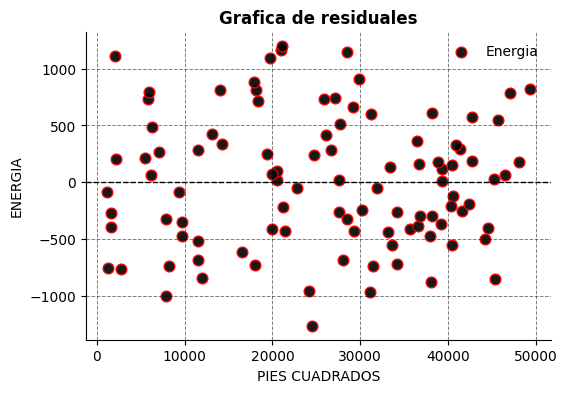

In [99]:
#8

import matplotlib.pyplot as plt
#configuracion general
plt.figure(
figsize=(6,4),
  dpi=100
)


#grafico de dispersion
plt.scatter(
    x,residuales,
    marker="o",
    color="black",
    edgecolors="red",
    alpha=0.9,
    s=60,
    label="Energia"

)


#Titulo
plt.title(
 "Grafica de residuales",
 fontsize=12,
 fontweight="bold"


)
#Etiqueta eje x
plt.xlabel (
    "PIES CUADRADOS",
    fontsize=10
)

#Etiqueta eje y
plt.ylabel (
    "ENERGIA",
    fontsize=10

)

#tamaño de los ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#margenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

#malla
plt.grid(
    visible= True,
    linestyle="--",
    linewidth= 0.7, #ancho de linea
    alpha=0.5,      #transparencia
    color="black"
)

#leyenda
plt.legend(
    fontsize=10,
    loc="best",
    frameon= False
    #bbox_to_anchor=(0.5,-0.15)

)

#Guardar imagen
plt.savefig(
    "dispersion",
    bbox_inches="tight"
)


plt.axhline (
    y=0,  #donde esta la linea horizontal
    label="Recta de regresion", #etiqueta
    color="black",
    linestyle="--", #estilo de linea
    linewidth=1.0 #ancho de la linea

    )